<img src="images/Plan.png" width="100" height="100" align=left>

## **PACE: Plan**

1. Identify any outliers:


What methods are best for identifying outliers?
* ###### using boxplot is one of the best ways to identify outliers



In [2]:
#packages for data manipulation
import pandas as pd
import numpy as np
#packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**


Data exploration and cleaning

In [4]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
print(f"the size of the data: {data.size}")
print(f"the shape of the data: {data.shape}")

the size of the data: 232584
the shape of the data: (19382, 12)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
data.groupby("claim_status").describe()

#                                                   \
               count     mean          std     min       25%      50%   
claim_status                                                            
claim         9608.0   4804.5  2773.735027     1.0   2402.75   4804.5   
opinion       9476.0  14346.5  2735.629909  9609.0  11977.75  14346.5   

                                video_id                ...  \
                   75%      max    count          mean  ...   
claim_status                                            ...   
claim          7206.25   9608.0   9608.0  5.627264e+09  ...   
opinion       16715.25  19084.0   9476.0  5.622382e+09  ...   

             video_download_count          video_comment_count              \
                              75%      max               count        mean   
claim_status                                                                 
claim                      2935.5  14994.0              9608.0  691.164863   
opinion                      19.0    101.0              9476.0    2.697446   

                                                            
                      std  min   25%    50%    75%     max  
claim_status                                                
claim         1017.216834  0.0  68.0  286.0  886.0  9599.0  
opinion          4.089288  0.0   0.0    1.0    3.0    32.0  

[2 rows x 64 columns]

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

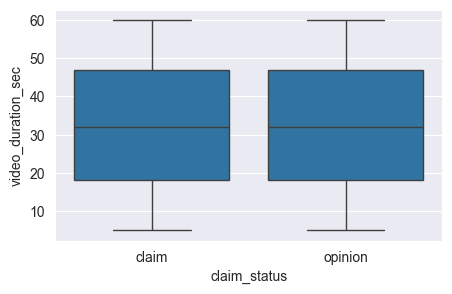

In [9]:
# visualizing distribution of `video_duration_sec`
plt.figure(figsize=(5,3))
sns.boxplot(data=data, x="claim_status", y="video_duration_sec")
plt.show()


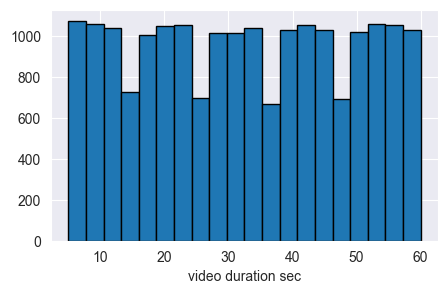

In [10]:
# a histogram of the values in the video_duration_sec for further insight for the distribution of this variable
plt.figure(figsize=(5,3))
plt.hist(data["video_duration_sec"], edgecolor='black',bins=20)
plt.xlabel("video duration sec")
plt.show()

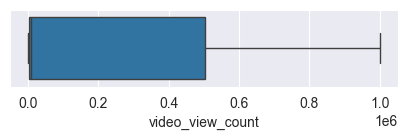

In [11]:
# visualizing distribution of `video_view_count`
plt.figure(figsize=(5, 1))
sns.boxplot(data=data, x="video_view_count")
plt.show()

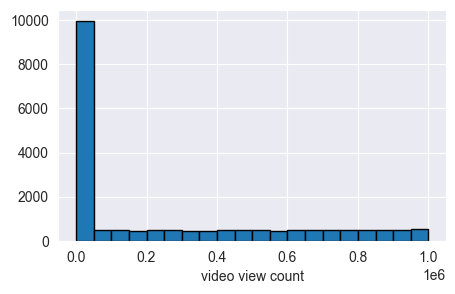

In [12]:
# a histogram of the values in the video_view_count for further insight for the distribution of this variable
plt.figure(figsize=(5,3))
plt.hist(data["video_view_count"], edgecolor='black',bins=20)
plt.xlabel("video view count")
plt.show()

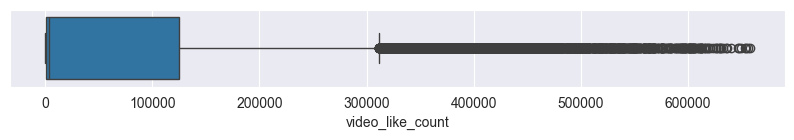

In [13]:
# visualizing distribution of `video_like_count`
plt.figure(figsize=(10, 1))
sns.boxplot(data=data, x="video_like_count")
plt.show()

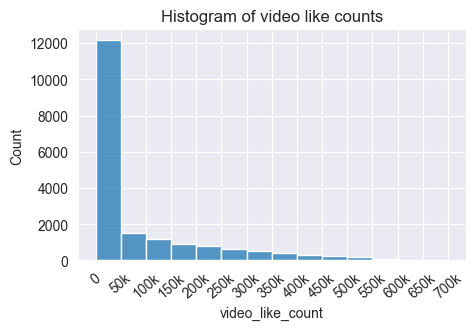

In [14]:
plt.figure(figsize=(5,3))
ax = sns.histplot(data=data, x="video_like_count", bins=range(0,(7*10**5+1),5*10**4))
labels = [0] + [str(i) + 'k' for i in range(50, 701, 50)]
ax.set_xticks(ticks=range(0,7*10**5+1,5*10**4), labels=labels, rotation=40)

plt.title("Histogram of video like counts")
plt.show()

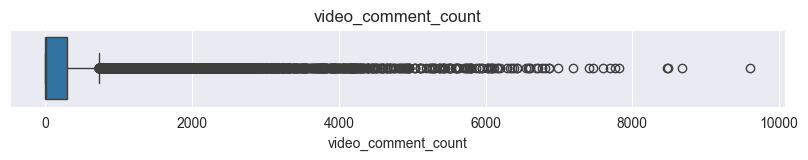

In [18]:
plt.figure(figsize=(10,1))
plt.title('video_comment_count')
sns.boxplot(data=data, x="video_comment_count")
plt.show()

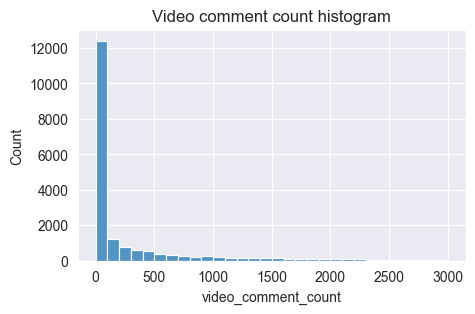

In [23]:
plt.figure(figsize=(5,3))
plt.title('Video comment count histogram');
sns.histplot(data=data, x="video_comment_count",bins=range(0,3001,100))
plt.show()

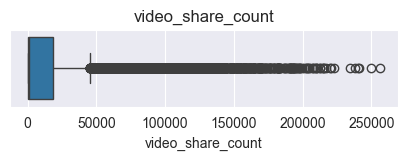

In [24]:
plt.figure(figsize=(5,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count']);

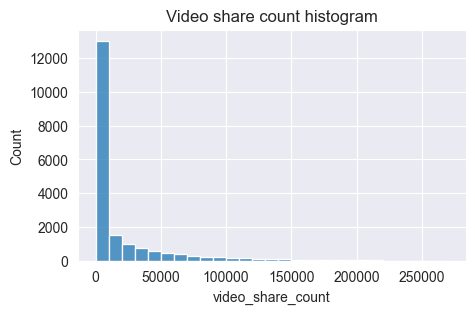

In [27]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,270001,10000))
plt.title('Video share count histogram');

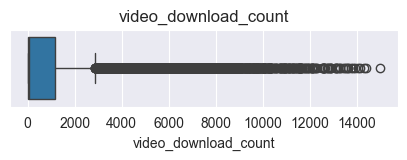

In [28]:
plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count']);

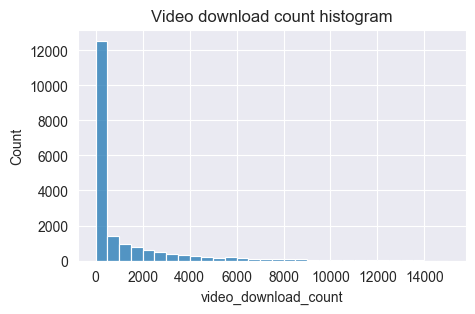

In [30]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,15001,500))
plt.title('Video download count histogram');

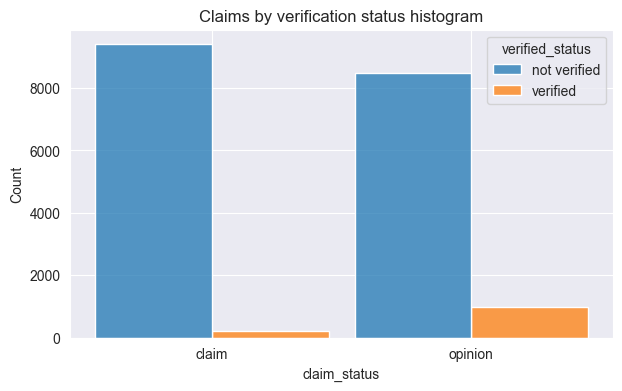

In [37]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

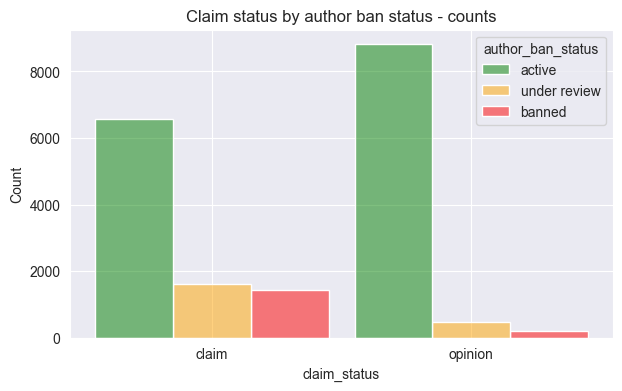

In [38]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

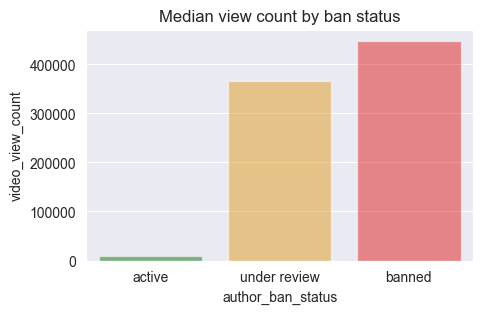

In [46]:
ban_status_count = data.groupby('author_ban_status').median(numeric_only=True).reset_index()


plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_count,
            y='video_view_count',
            x='author_ban_status',
            hue="author_ban_status",
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5,
            legend=False
 )
plt.title('Median view count by ban status')
plt.show()

In [47]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

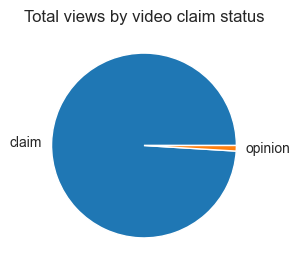

In [51]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

In [58]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)

Number of outliers, video_view_count: 2343
Number of outliers, video_like_count: 3468
Number of outliers, video_share_count: 3732
Number of outliers, video_download_count: 3733
Number of outliers, video_comment_count: 3882


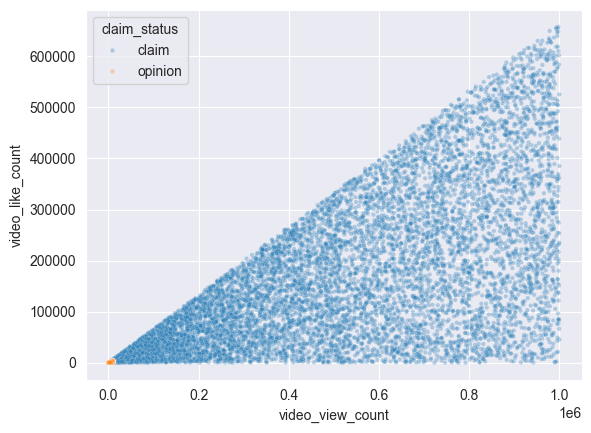

In [52]:
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

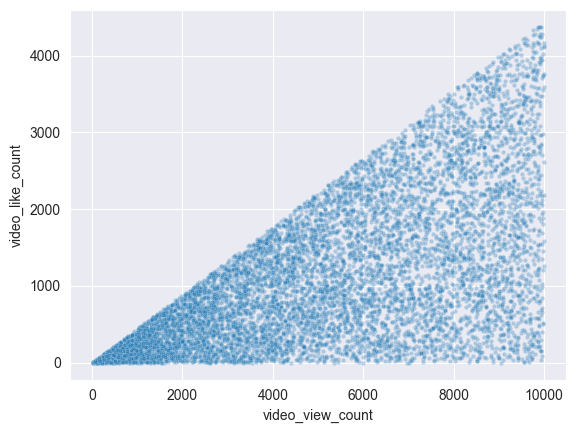

In [53]:
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()